# Approach 1

(more EDA-focused)

Features

* **ID** = Customer ID of Applicant
* **year** = Year of Application
* **loan limit** = maximum avaliable amount of the loan allowed to be taken
* **Gender** = sex type
* **approv_in_adv** = Is loan pre-approved or not
* **loan_type** = Type of loan
* **loan_purpose** = the reason you want to borrow money
* **Credit_Worthiness** = is how a lender determines that you will default on your debt obligations, or how worthy you are to receive new credit.
* **open_credit** = is a pre-approved loan between a lender and a borrower. It allows the borrower to make repeated withdrawals up to a certain limit.
* **business_or_commercial** = Usage type of the loan amount
* **loan_amount** = The exact loan amount
* **rate_of_interest** = is the amount a lender charges a borrower and is a  percentage of the principal—the amount loaned.
* **Interest_rate_spread** = the difference between the interest rate a financial institution pays to depositors and the interest rate it receives from loans
* **Upfront_charges** = Fee paid to a lender by a borrower as consideration for making a new loan
* **term** = the loan's repayment period
* **Neg_ammortization** = refers to a situation when a loan borrower makes a payment less than the standard installment set by the bank.
* **interest_only** = amount of interest only without principles
* **lump_sum_payment** = is an amount of money that is paid in one single payment rather than in installments.
* **property_value** = the present worth of future benefits arising from the ownership of the property
* **construction_type** = Collateral construction type
* **occupancy_type** = classifications refer to categorizing structures based on their usage
* **Secured_by** = Type of Collatoral
* **total_units** = number of unites
* **income** = refers to the amount of money, property, and other transfers of value received over a set period of time
* **credit_type** = type of credit
* **co-applicant_credit_type** = is an additional person involved in the loan application process. Both applicant and co-applicant apply and sign for the loan
* **age** = applicant's age
* **submission_of_application** = Ensure the application is complete or not
* **LTV** = life-time value (LTV) is a prognostication of the net profit
* **Region** = applicant's place
* **Security_Type** = Type of Collatoral
* **status** = Loan status (Approved/Declined)
* **dtir1** = debt-to-income ratio

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Personal Projects/Credit Risk Assessment/Loan_Default.csv")
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [5]:
df.shape

(148670, 34)

In [6]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

Its more preferrable to convert all features to lower case

In [7]:
df.columns= df.columns.str.lower()
df.columns

Index(['id', 'year', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'credit_worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_rate_spread', 'upfront_charges', 'term', 'neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'income', 'credit_type', 'credit_score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'ltv', 'region', 'security_type',
       'status', 'dtir1'],
      dtype='object')

Filtering data ,since there are large number of unuseful columns which can be dropped without a bad effect on the performance of the model

7 Factors Lenders Look at When Considering Your Loan Application
* Your credit score. ...
* Your income and employment history. ...
* Your debt-to-income ratio. ...
* Value of your collateral. ...
* Size of down payment. ...
* Liquid assets. ...
* Loan term.

We can drop ['id' ,'loan_limit' , 'gender' ,'approv_in_adv' ,'loan_purpose' ,'open_credit' ,'business_or_commercial']  because they don't add any valuable information

We can even drop **'year'** as it includes only one year 2019

In [8]:
columns= ['id', 'year', 'loan_limit', 'gender', 'approv_in_adv','loan_purpose', 'credit_worthiness', 'open_credit','business_or_commercial','interest_rate_spread', 'upfront_charges', 'neg_ammortization','interest_only', 'lump_sum_payment','construction_type', 'occupancy_type', 'secured_by', 'total_units','credit_type', 'co-applicant_credit_type','submission_of_application', 'ltv', 'region', 'security_type']
df.drop(columns,axis=1, inplace =True)

In [9]:
df.columns

Index(['loan_type', 'loan_amount', 'rate_of_interest', 'term',
       'property_value', 'income', 'credit_score', 'age', 'status', 'dtir1'],
      dtype='object')

In [10]:
df.shape

(148670, 10)

We're left with much lesser but impactful features in our hand

In [11]:
pd.set_option("display.max_columns", df.shape[-1])
df.head()

,loan_type,loan_amount,rate_of_interest,term,property_value,income,credit_score,age,status,dtir1
0,type1,116500,NaN,360.0,118000.0,1740.0,758,25-34,1,45.0
1,type2,206500,NaN,360.0,NaN,4980.0,552,55-64,1,NaN
2,type1,406500,4.56,360.0,508000.0,9480.0,834,35-44,0,46.0
3,type1,456500,4.25,360.0,658000.0,11880.0,587,45-54,0,42.0
4,type1,696500,4.00,360.0,758000.0,10440.0,602,25-34,0,39.0


### Check for Duplicates

In [12]:
df.duplicated().sum()

6

In [13]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [14]:
df.shape

(148664, 10)

### Check for null values

In [15]:
df.isna().sum()

,0
loan_type,0
loan_amount,0
rate_of_interest,36437
term,41
property_value,15096
income,9146
credit_score,0
age,200
status,0
dtir1,24115


In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
df[['rate_of_interest', 'term','property_value','income','dtir1']] = imputer.fit_transform(df[['rate_of_interest', 'term','property_value','income','dtir1']])

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df[['age']] = imputer.fit_transform(df[['age']])

In [18]:
df.isna().sum()

,0
loan_type,0
loan_amount,0
rate_of_interest,0
term,0
property_value,0
income,0
credit_score,0
age,0
status,0
dtir1,0


### Characteristics of data

In [19]:
df['loan_type'].max()

'type3'

In [20]:
df['loan_type'].min()

'type1'

In [21]:
df['loan_amount'].max()

3576500

In [22]:
df['loan_amount'].min()

16500

In [23]:
df['age'].value_counts()

,count
age,
45-54,34919
35-44,32815
55-64,32533
65-74,20744
25-34,19141
>74,7175
<25,1337


In [24]:
df['rate_of_interest'].max()

8.0

In [25]:
df['rate_of_interest'].min()

0.0

In [26]:
df['rate_of_interest'].mean()

4.045481969579513

In [27]:
df['status'].value_counts()

,count
status,
0,112027
1,36637


Large no. of applications are not eligable to loan

In [28]:
df['property_value'].value_counts()

,count
property_value,
4.979002e+05,15096
3.080000e+05,2791
2.580000e+05,2763
3.580000e+05,2679
4.080000e+05,2537
...,...
4.648000e+06,1
3.878000e+06,1
5.758000e+06,1


In [29]:
df['property_value'].max()

16508000.0

In [30]:
df['property_value'].min()

8000.0

In [31]:
df['loan_amount'].max()

3576500

In [32]:
mask=df['property_value']==df['property_value'].max()
df[mask]['loan_amount']

,loan_amount
17114,2476500


In [33]:
mask = df['income']==df['income'].max()
df[mask]['status']

,status
62237,1


In [34]:
mask = df['income']==df['income'].max()
df[mask]['rate_of_interest']

,rate_of_interest
62237,4.045482


In [35]:
mask = df['income']==df['income'].min()
df[mask]['status']

,status
42,1
143,1
208,1
301,1
409,1
...,...
147632,1
147728,1
148163,1
148197,1


In [36]:
mask = df['income']==df['income'].min()
df[mask]['rate_of_interest'].value_counts()

,count
rate_of_interest,
4.045482,1251
4.125000,2
3.625000,1
2.990000,1
4.750000,1
0.000000,1
3.875000,1
4.250000,1


We discoverd that there is a problem in the data must be handeled

In [37]:
df['income'].value_counts()

,count
income,
6957.392164,9146
0.000000,1259
3600.000000,1250
4200.000000,1243
4800.000000,1191
...,...
45300.000000,1
154440.000000,1
137760.000000,1


In [38]:
df['income'].mean()

6957.392164451898

In [39]:
mask=df['income']<2000
mask.value_counts()

,count
income,
False,140706
True,7958


In [40]:
df['income']=df['income'].apply(lambda x: x if x not in mask else df['income'].mean())

In [41]:
mask=df['income']<2000
mask.value_counts()

,count
income,
False,148664


In [42]:
df['income'].min()

6957.392164451898

In [43]:
df['rate_of_interest'].value_counts()

,count
rate_of_interest,
4.045482,36437
3.990000,14454
3.625000,8799
3.875000,8592
3.750000,8473
...,...
4.700000,1
8.000000,1
7.750000,1


In [44]:
df['rate_of_interest'].min()

0.0

Interest shall not be zero

In [45]:
df['rate_of_interest'].mean()

4.045481969579513

In [46]:
mask=df['rate_of_interest']==0
mask.value_counts()

,count
rate_of_interest,
False,148663
True,1


In [47]:
df['rate_of_interest']=df['rate_of_interest'].apply(lambda x: x if x not in mask else df['rate_of_interest'].mean())

In [48]:
df['rate_of_interest'].min()

2.125

### Exploratory Data Analysis

<Axes: xlabel='loan_type', ylabel='count'>

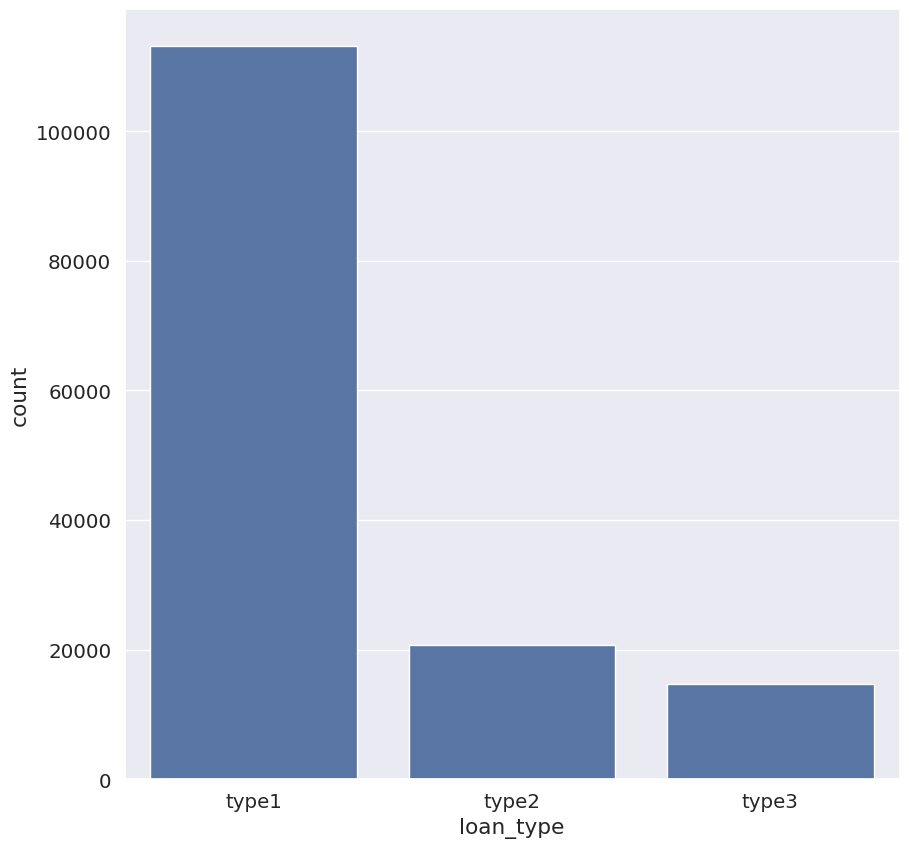

In [49]:
sns.countplot(data=df , x='loan_type')

<Axes: xlabel='status', ylabel='count'>

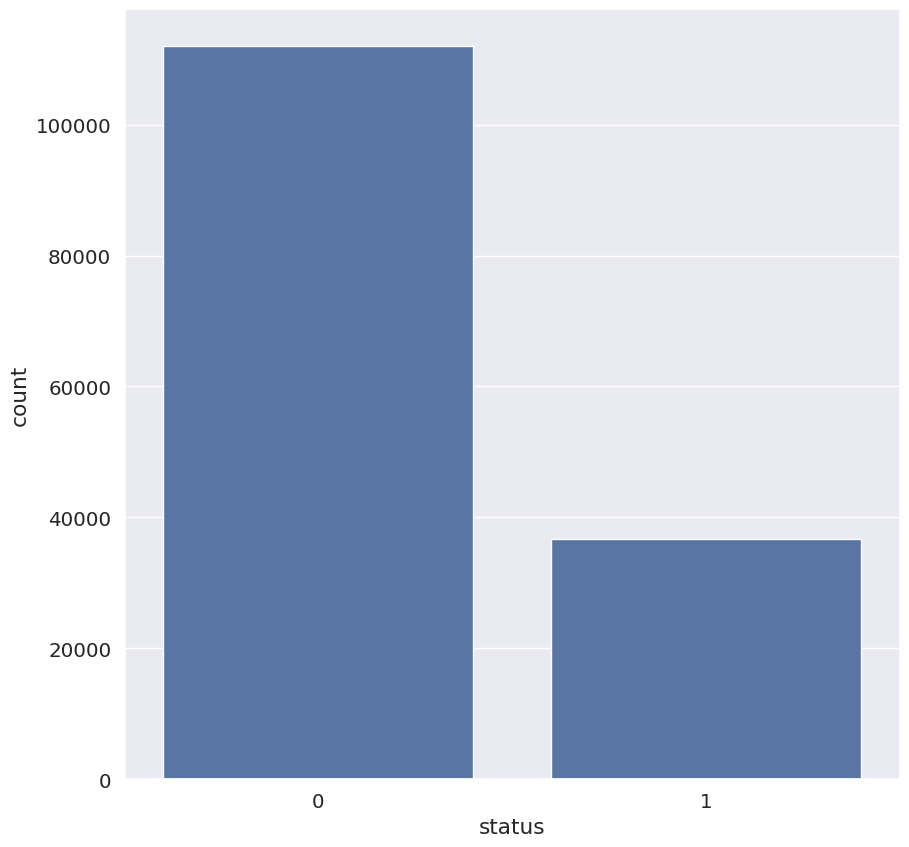

In [50]:
sns.countplot(data=df , x='status')

<Axes: xlabel='age', ylabel='count'>

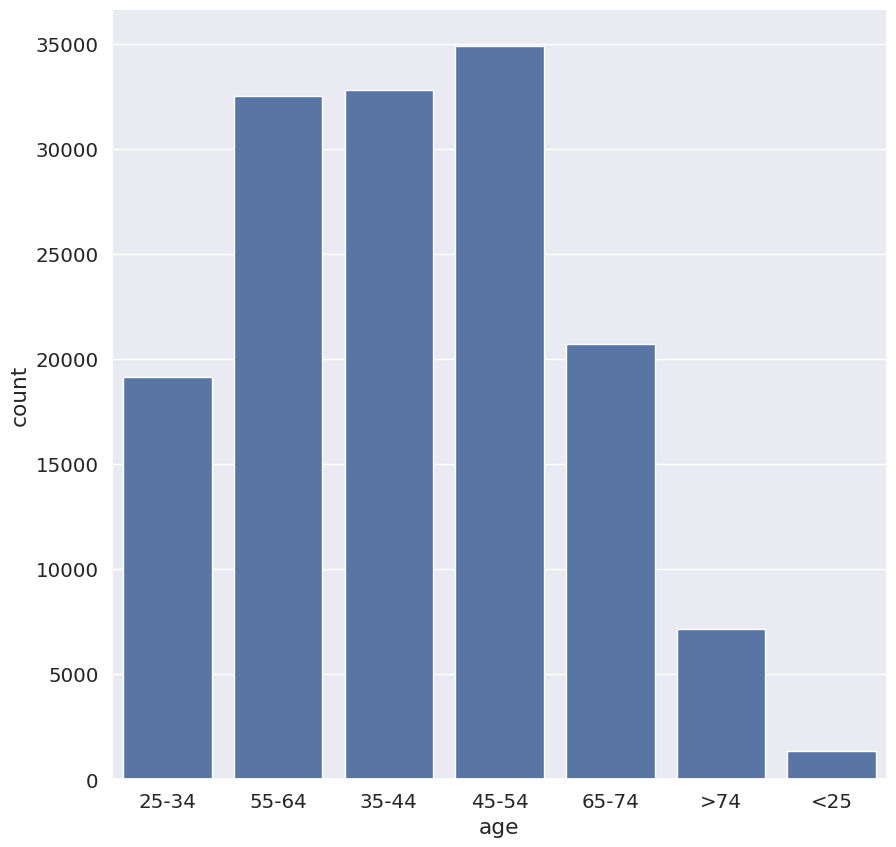

In [51]:
sns.countplot(data=df , x='age')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='rate_of_interest', ylabel='income'>

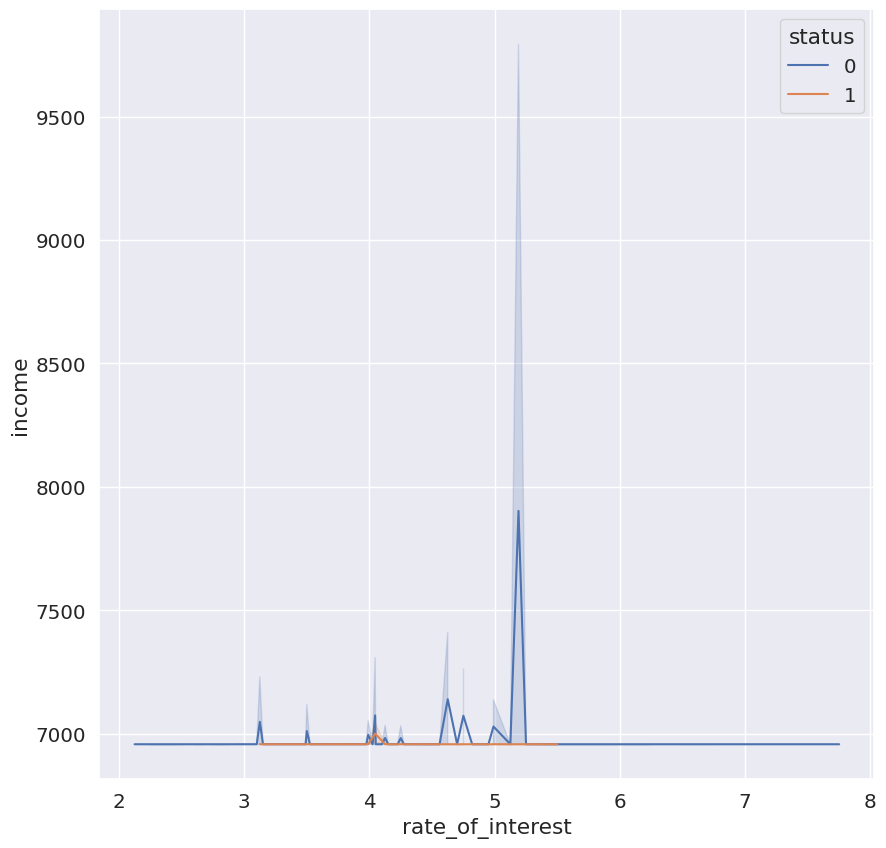

In [52]:
sns.lineplot(data=df, x="rate_of_interest", y="income", hue="status")

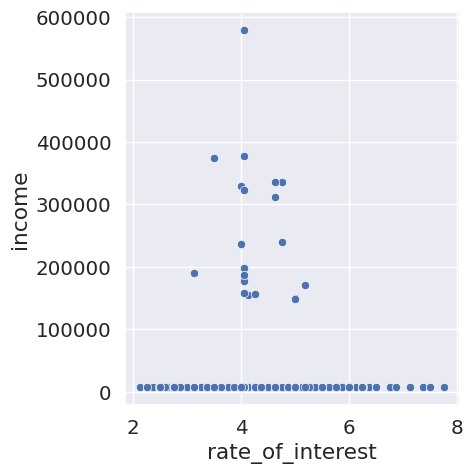

In [53]:
sns.relplot(x ="rate_of_interest", y ="income",data = df)

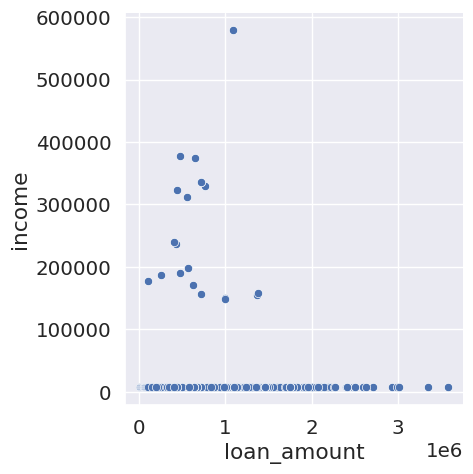

In [54]:
sns.relplot(x ="loan_amount", y ="income",data = df)

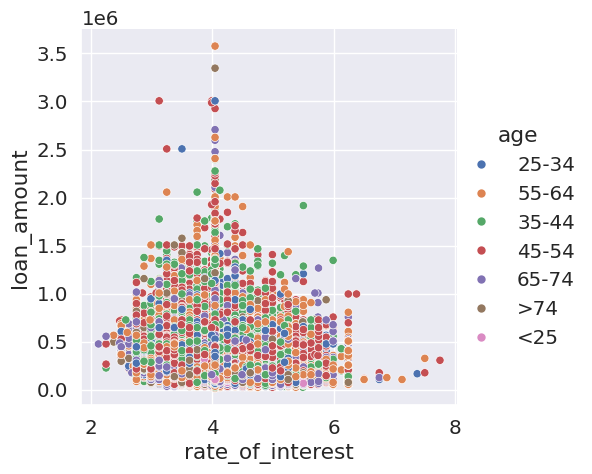

In [55]:
sns.relplot(x ="rate_of_interest", y ="loan_amount", hue='age' ,data = df)

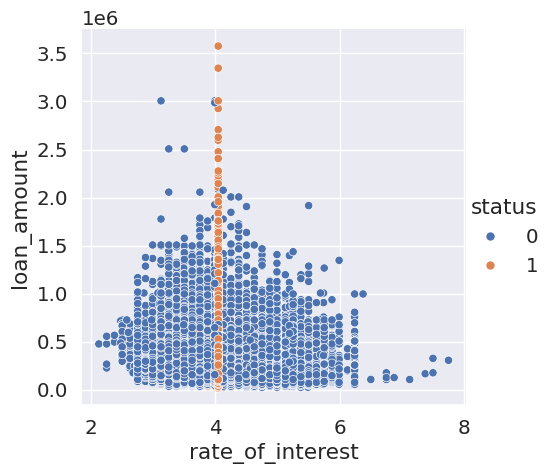

In [56]:
sns.relplot(x ="rate_of_interest", y ="loan_amount", hue='status' ,data = df)

<ipython-input-57-bc3b6db04a56>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amount'])


<Axes: xlabel='loan_amount', ylabel='Density'>

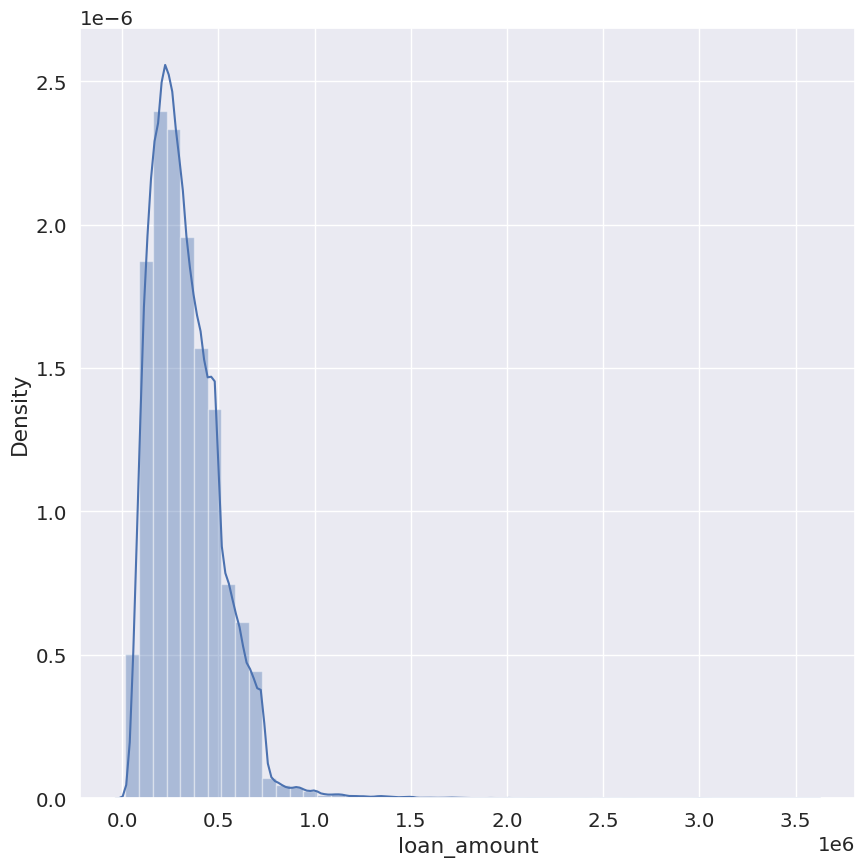

In [57]:
sns.distplot(df['loan_amount'])

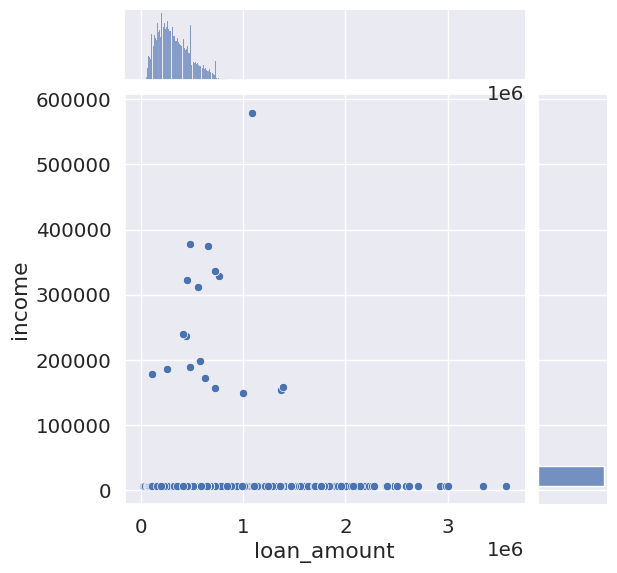

In [58]:
sns.jointplot(data=df,x='loan_amount' , y = 'income')

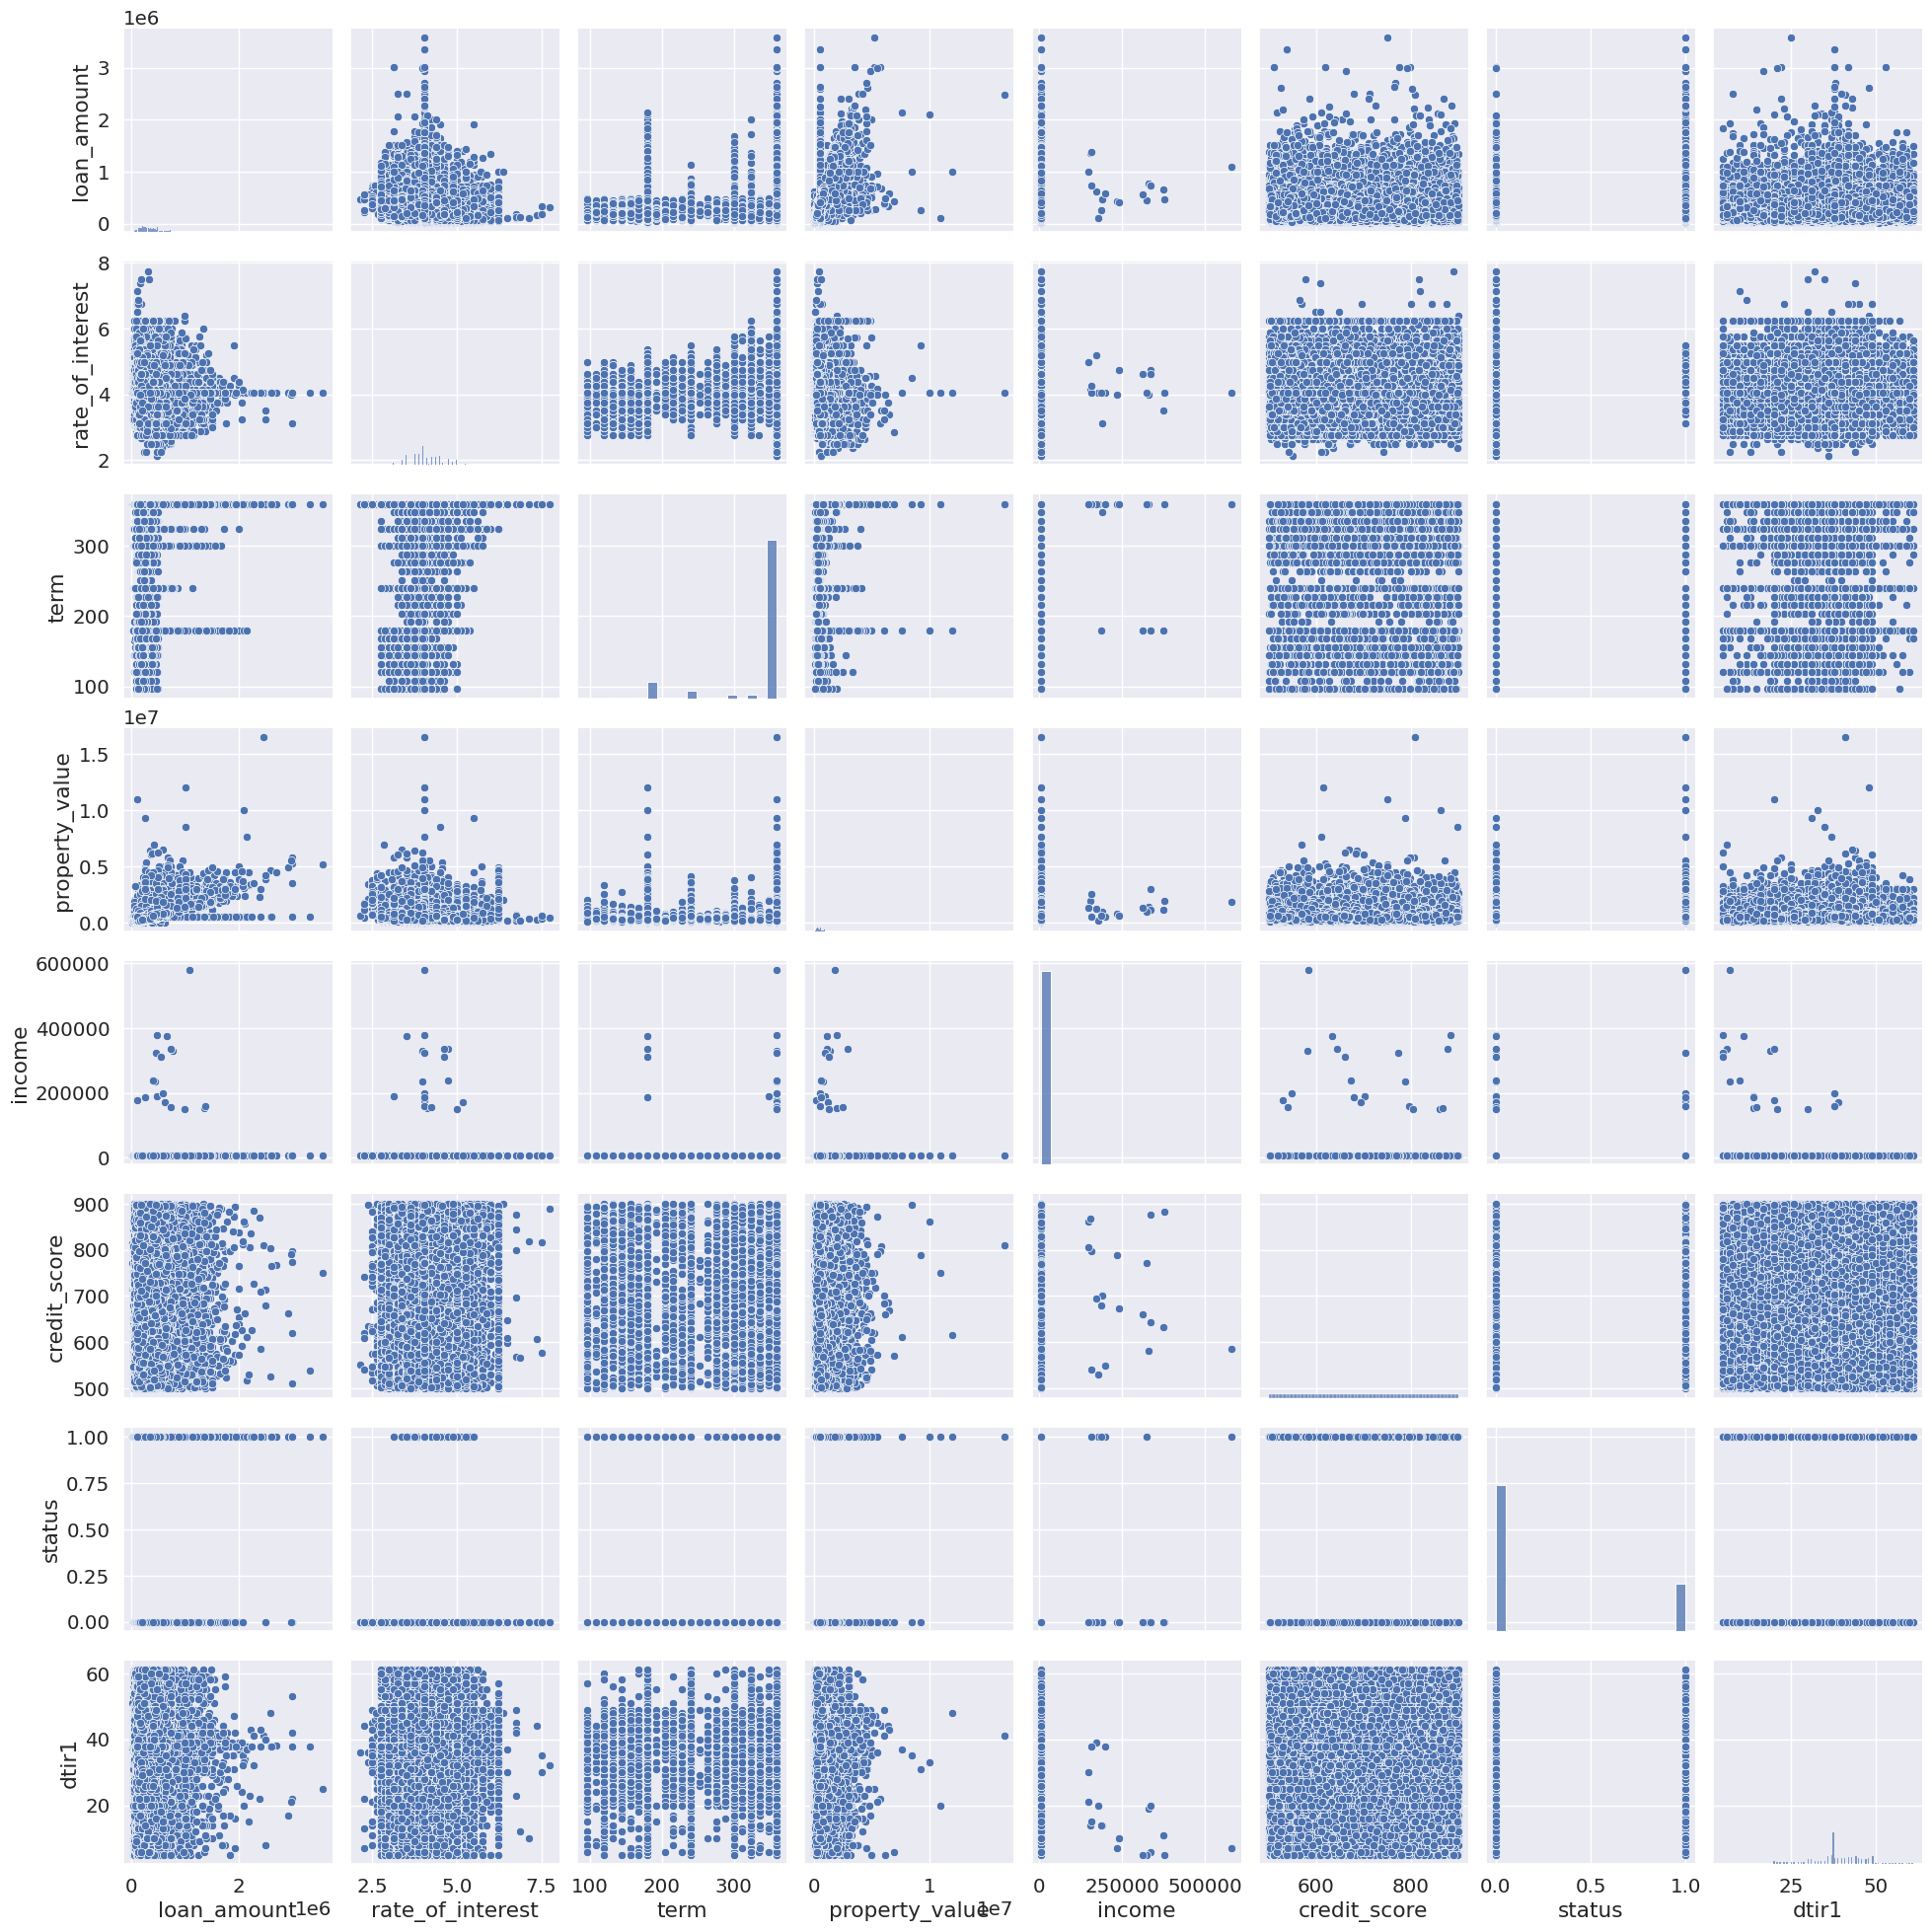

In [59]:
sns.pairplot(df)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='status', ylabel='loan_amount'>

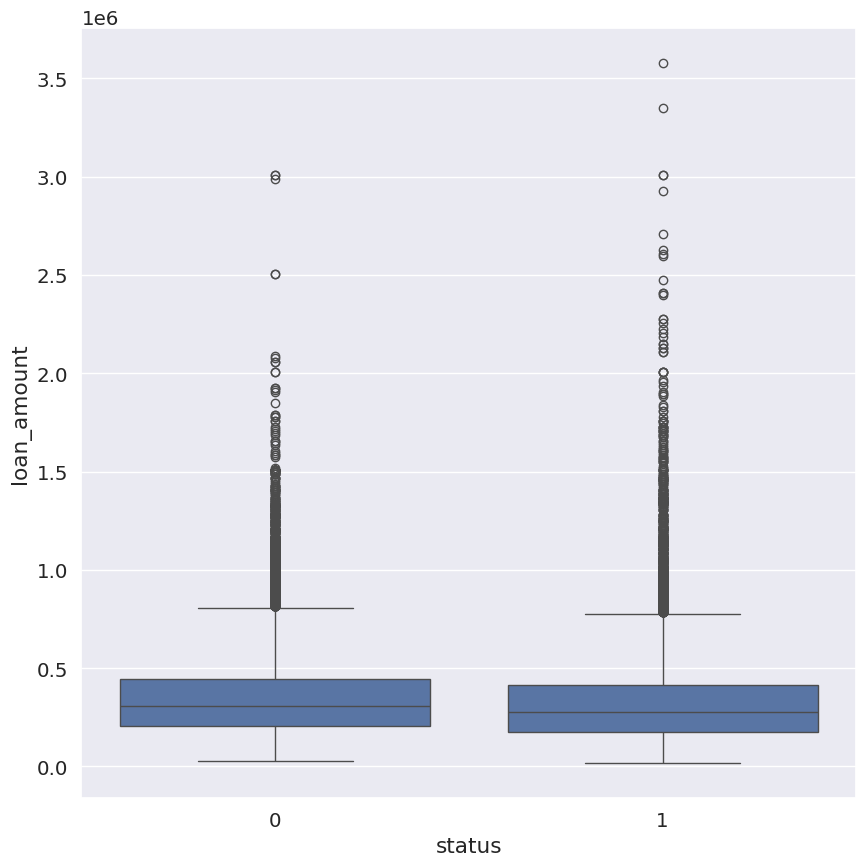

In [60]:
sns.boxplot(data=df , x='status' , y ='loan_amount')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='status', ylabel='term'>

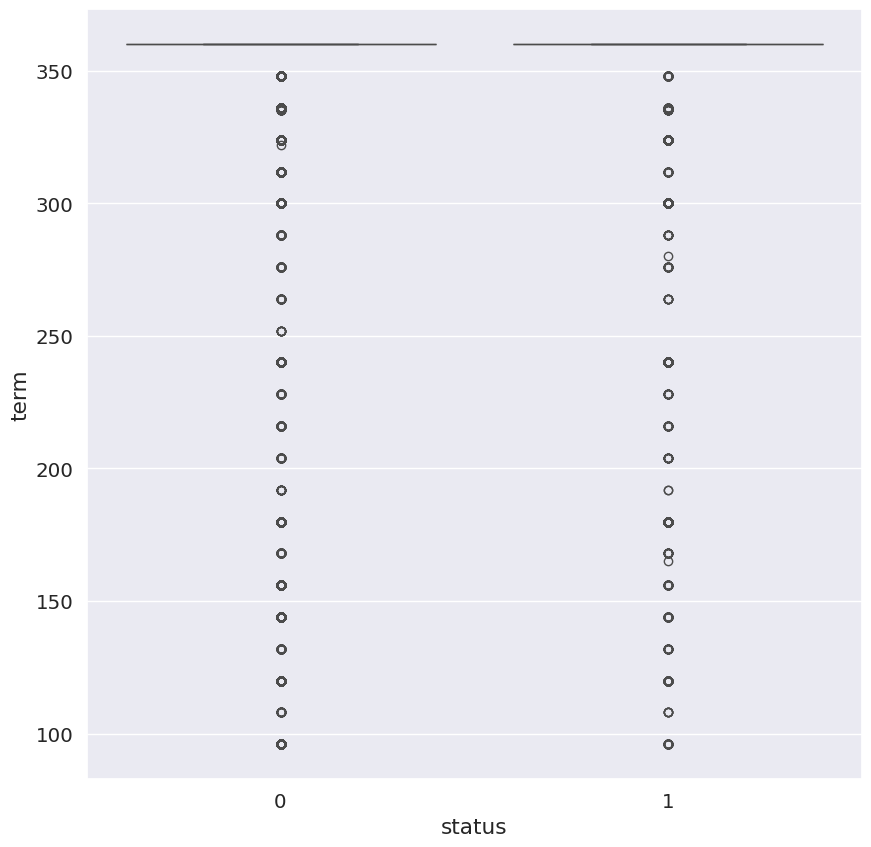

In [61]:
sns.boxplot(data=df , x='status' , y ='term')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: xlabel='status', ylabel='income'>

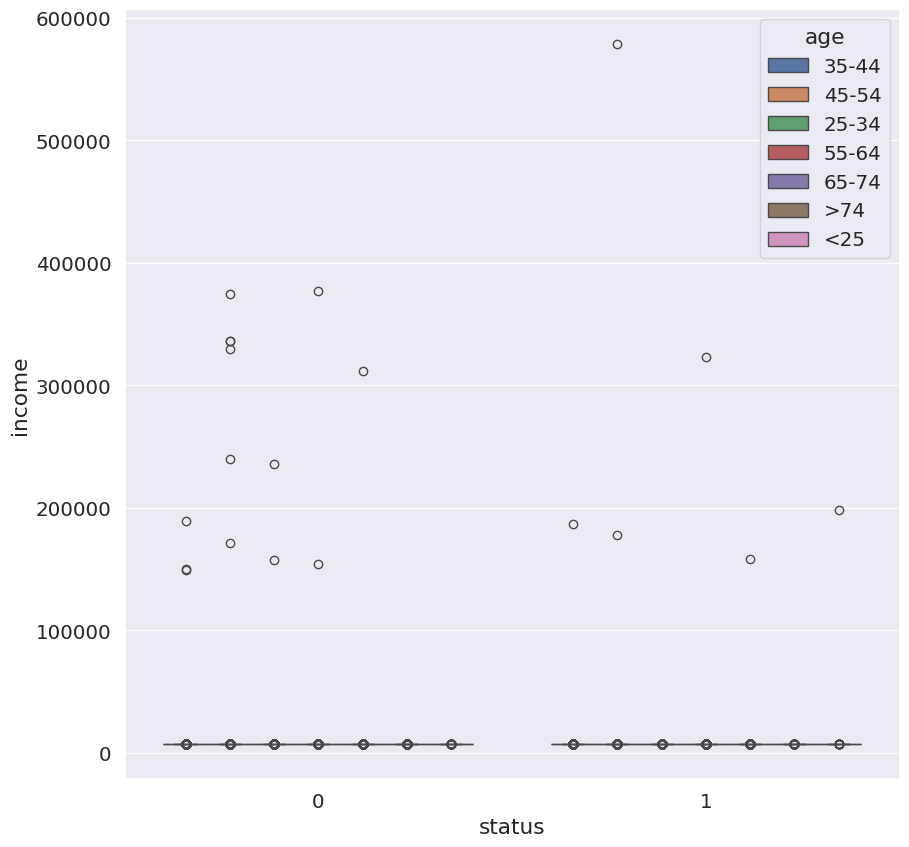

In [62]:
sns.boxplot(data=df , x='status' , y ='income' , hue='age')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: xlabel='age', ylabel='credit_score'>

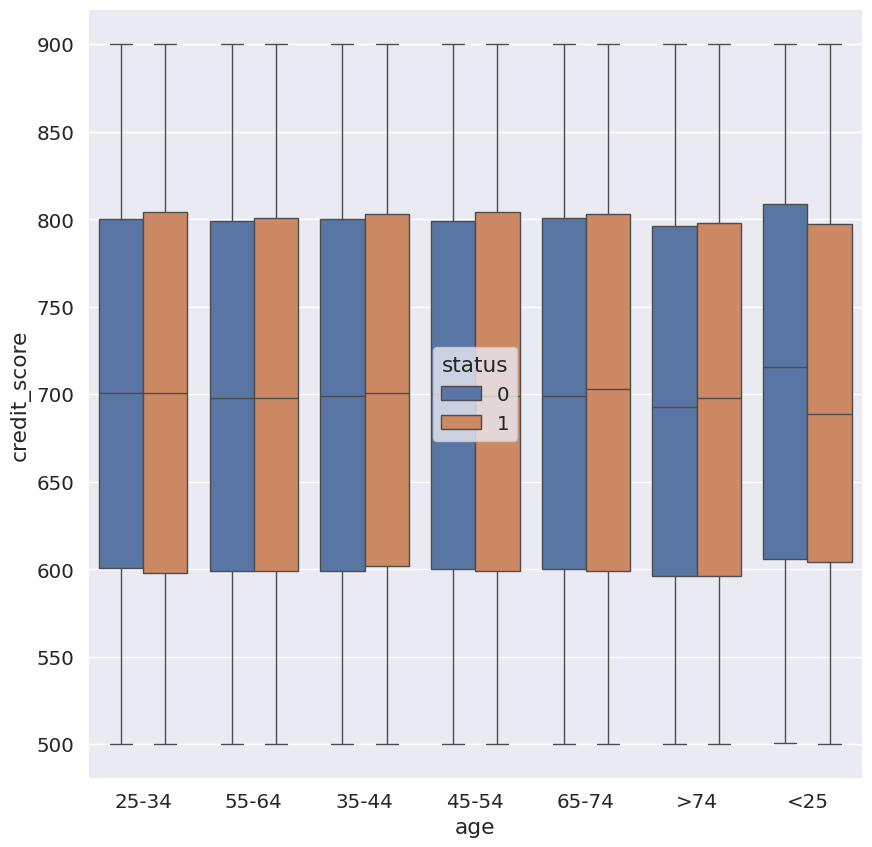

In [63]:
sns.boxplot(data=df , x='age' , y ='credit_score' , hue='status')

<Axes: >

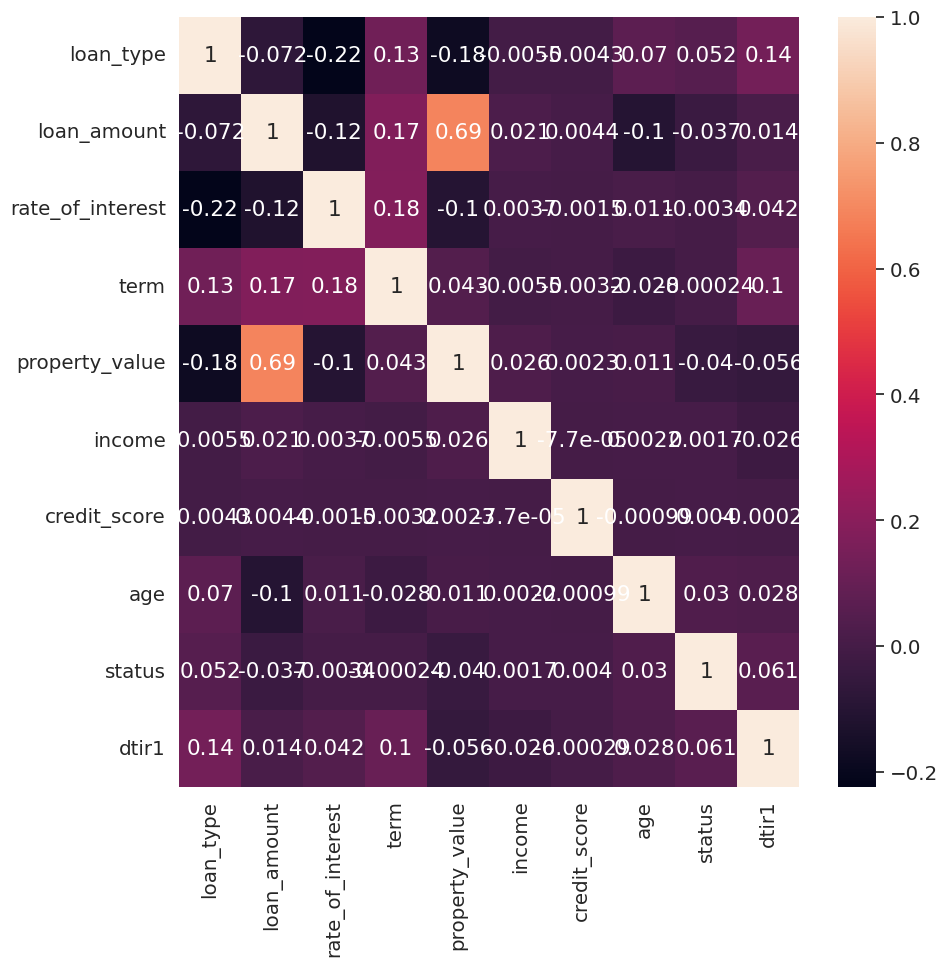

In [66]:
# Convert 'loan_type' column to numeric values if it contains non-numeric values
if df['loan_type'].dtype == 'object':
    df['loan_type'] = pd.factorize(df['loan_type'])[0]

# Convert 'age' column to numeric values
df['age'] = pd.factorize(df['age'])[0]

sns.heatmap(df.corr(), annot=True)

### Conclusion

* This model was created for predicting the eligibility for a loan (approved or not) according to many features.
* There were large number of features must be dropped , as:
   *   Some of these features were meaningless such as (ID, Year, upfront charges, approved in advance…).
   *   Some features had the same meaning and give the same information such as (loan purpose & loam type, Credit worthiness & credit score, Secured by & property value, LTV & dtir…)
   *   Some features related to the post-process of approval such as (Nag amortization, submission of application…)
* From all of these features (Loan type, loan amount rate of interest, term, property value, income, credit score, age and dirt) were used to predict the eligibility for loan.
* We were asked to fill (Nan values) for some features and predict other values for some illogical values (income, interest rate).
* Number of unapproved loans were larger than approved.
* Loan amounts were between (3,576,500 and 16,500) with average interest rate (4.05).
* The largest category applied for alone there ages were between (45-54) for loan of (type 3).
* There is a lightly linear correlation between features and manly strong between (loan amount & property value& income).
* After handling outliers and scaling, we were asked to convert all values to numerical values to be ready to be used for the model.